Euclidean

In [1]:
import os
import numpy as np
import scipy.optimize
from scipy.optimize import linear_sum_assignment

def load_minutiae_points(file_path):
    minutiae_points = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        filename = os.path.basename(lines[0].strip())
        minutiae_data = lines[2:]
        minutiae_points[filename] = sorted([(int((x:=data.split())[0]), int(x[1])) for data in minutiae_data])
    return minutiae_points

def calculate_euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return distance

def calculate_assignment_matrix(gt_points, alg_points, distance_threshold):
    n = len(gt_points)
    m = len(alg_points)
    matrix = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            distance = calculate_euclidean_distance(gt_points[i], alg_points[j])
            if distance <= distance_threshold:
                matrix[i, j] = 1

    return matrix


In [5]:

# File paths for datasets 1 and 2 containing minutiae points
# Replace 'fvc2006db2a_traditional_minutiae' and 'Minutiae_points_fvc2006db2_fingernet' with your actual folder names
dataset1_folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2006_DB2_A_m25'
dataset2_folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/Minutiae_points_fvc2006db2_fingernet'

print("Dataset 1 folder exists:", os.path.exists(dataset1_folder))
print("Dataset 2 folder exists:", os.path.exists(dataset2_folder))

# Check if files exist in the folders
print("Files in dataset 1 folder:", os.listdir(dataset1_folder))
print("Files in dataset 2 folder:", os.listdir(dataset2_folder))

# Load minutiae points from both datasets
dataset1_points = {}
for file in os.listdir(dataset1_folder):
    if file.endswith('.mnt'):
        dataset1_points.update(load_minutiae_points(os.path.join(dataset1_folder, file)))

dataset2_points = {}
for file in os.listdir(dataset2_folder):
    if file.endswith('.mnt'):
        dataset2_points.update(load_minutiae_points(os.path.join(dataset2_folder, file)))

# Calculate evaluation metrics based on direct matching
# ... (Previous code remains unchanged)

# Initialize variables to accumulate False Negatives and total ground-truth minutiae points
# ... (Previous code remains unchanged)

# Initialize variables to accumulate False Negatives and total ground-truth minutiae points
# ... (Previous code remains unchanged)


Dataset 1 folder exists: True
Dataset 2 folder exists: True
Files in dataset 1 folder: ['36_2.mnt', '74_2.mnt', '100_10.mnt', '10_11.mnt', '13_11.mnt', '55_12.mnt', '11_6.mnt', '67_4.mnt', '80_12.mnt', '120_9.mnt', '92_4.mnt', '112_2.mnt', '41_11.mnt', '67_3.mnt', '139_5.mnt', '50_10.mnt', '124_5.mnt', '15_10.mnt', '140_3.mnt', '67_10.mnt', '4_11.mnt', '122_8.mnt', '28_9.mnt', '19_12.mnt', '35_9.mnt', '112_9.mnt', '106_11.mnt', '91_10.mnt', '14_11.mnt', '13_8.mnt', '69_11.mnt', '58_1.mnt', '85_5.mnt', '83_8.mnt', '128_5.mnt', '49_3.mnt', '100_1.mnt', '70_10.mnt', '89_11.mnt', '43_7.mnt', '74_8.mnt', '76_6.mnt', '30_5.mnt', '96_4.mnt', '57_6.mnt', '128_11.mnt', '4_7.mnt', '87_1.mnt', '24_11.mnt', '73_4.mnt', '73_2.mnt', '56_10.mnt', '61_11.mnt', '69_5.mnt', '73_9.mnt', '70_12.mnt', '66_3.mnt', '118_3.mnt', '92_9.mnt', '47_12.mnt', '71_8.mnt', '59_12.mnt', '121_8.mnt', '71_11.mnt', '64_1.mnt', '96_7.mnt', '135_7.mnt', '123_7.mnt', '57_3.mnt', '32_12.mnt', '37_1.mnt', '83_1.mnt', '124_12.

In [6]:
import os
import numpy as np
from scipy.optimize import linear_sum_assignment

# ... (Previous functions and initializations remain unchanged)

def evaluate_at_threshold(dataset1_points, dataset2_points, distance_threshold):
    # Initialize variables to accumulate evaluation metrics for the entire dataset
    true_positives_total = 0
    false_positives_total = 0
    false_negatives_total = 0
    accuracy_total = 0
    total_gt_minutiae = 0
    count = 0

    # Iterate through all files in the dataset
    for filename in dataset1_points.keys():
        count += 1
        if filename in dataset2_points:
            gt_points = dataset1_points[filename]
            alg_points = dataset2_points[filename]

            matrix = calculate_assignment_matrix(gt_points, alg_points, distance_threshold)
            # row_ind, col_ind = linear_sum_assignment(matrix)

            # Count true positives and correctly matched minutiae points for the current file
            true_positives =np.count_nonzero(matrix)
            true_positives_total += true_positives

            # Count false negatives (ground-truth minutiae not matched by the algorithm) for the current file
            false_negative = len(gt_points) - true_positives
            false_negatives_total += len(gt_points) - true_positives

            # Count total ground-truth minutiae points for calculating recall
            total_gt_minutiae += len(gt_points)

            # Count false positives (algorithm minutiae not matched by ground-truth)
            false_positives = len(alg_points) - true_positives
            false_positives_total += len(alg_points) - true_positives


            if len(gt_points) != 0:
                accuracy = (true_positives /(true_positives+false_negative+false_positives))*100
                accuracy_total += accuracy

    # Calculate Recall (True Positive Rate) for the entire dataset
    recall = true_positives_total / (true_positives_total + false_negatives_total)

    # Calculate Precision for the entire dataset
    precision = true_positives_total / (true_positives_total + false_positives_total) if (true_positives_total + false_positives_total) != 0 else 0.0

    

    # Calculate F1 Score for the entire dataset
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

    # Calculate Accuracy for the entire dataset 
    if count == 0:
        avg_accuracy = 0
    else:
        avg_accuracy = accuracy_total / count
    return precision, recall, f1_score,avg_accuracy




Threshold: 1, Precision: 0.0026322324310901414, Recall: 0.001509317902218982, F1-score: 0.0019185450912394886,Accuracy: 0.08990621753898445
Threshold: 2, Precision: 0.006893469083685126, Recall: 0.003952704242037636, F1-score: 0.005024416201208322,Accuracy: 0.23135332035418696
Threshold: 3, Precision: 0.01526694810032282, Recall: 0.008754043832870095, F1-score: 0.011127561529189032,Accuracy: 0.5178460310979602
Threshold: 4, Precision: 0.026600446982865657, Recall: 0.015252654121292205, F1-score: 0.019388165110714534,Accuracy: 0.9006217299142911
Threshold: 5, Precision: 0.043953315122920285, Recall: 0.025202761197430174, F1-score: 0.0320360831273009,Accuracy: 1.4935094802352182
Threshold: 6, Precision: 0.060809535634467345, Recall: 0.034868091310885314, F1-score: 0.044322011504030756,Accuracy: 2.0846636017342006
Threshold: 7, Precision: 0.07994040228457909, Recall: 0.0458376999134278, F1-score: 0.058265852431303417,Accuracy: 2.768869322785154
Threshold: 8, Precision: 0.10567668239384156

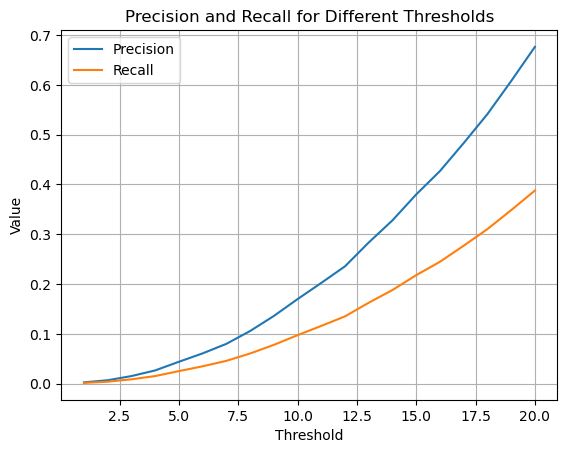

In [7]:
import os
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt


# Now, you can use the function for different threshold values between 1 and 20
thresholds = list(range(1, 21))
# thresholds = [1,10]
precision_list = []
recall_list = []
accuracy_list = []

for threshold in thresholds:
    precision, recall, f1_score,accuracy = evaluate_at_threshold(dataset1_points, dataset2_points, threshold)
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    print(f"Threshold: {threshold}, Precision: {precision}, Recall: {recall}, F1-score: {f1_score},Accuracy: {accuracy}")

# Plotting the graph
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
print(precision_list[15])
print(recall_list[15])

0.4872656291496255
0.27766637660323107


Text(0.5, 1.0, 'Precision-Recall Curve')

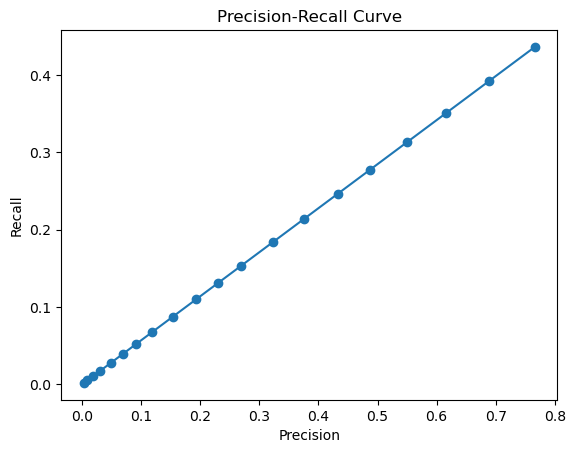

In [17]:
plt.plot(precision_list, recall_list, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])

In [45]:

import os
import numpy as np
from scipy.optimize import linear_sum_assignment

# ... (Previous functions and initializations remain unchanged)

# Initialize variables to accumulate evaluation metrics for the entire dataset

# Initialize variables to accumulate evaluation metrics for the entire dataset
true_positives_total = 0
false_positives_total = 0
false_negatives_total = 0
total_gt_minutiae = 0
distance_threshold = 5

precision_list=[]
recall_list=[]

# Iterate through all files in the dataset
for filename in dataset1_points.keys():
    if filename in dataset2_points:
        # print(f"File: {filename}")
        gt_points = dataset1_points[filename]
        alg_points = dataset2_points[filename]    
         
        matrix = calculate_assignment_matrix(gt_points, alg_points, distance_threshold)
        row_ind, col_ind = linear_sum_assignment(matrix)

        # Count true positives and correctly matched minutiae points for the current file
        true_positives = np.count_nonzero(matrix[row_ind, col_ind] <= distance_threshold)
        true_positives_total += true_positives

        # Count false negatives (ground-truth minutiae not matched by the algorithm) for the current file
        # false_negatives = len(gt_points) - true_positives
        false_negatives_total += len(gt_points) - true_positives

        # Count total ground-truth minutiae points for calculating recall
        total_gt_minutiae += len(gt_points)

        # Count false positives (algorithm minutiae not matched by ground-truth)
        # false_positives = len(alg_points) - true_positives
        false_positives_total += len(alg_points) - true_positives

        # # Calculate Recall (True Positive Rate) for the current file
        # recall = true_positives / (true_positives + false_negatives)  if (true_positives + false_negatives) != 0 else 0.0
        # recall_list.append(recall)

        # # Calculate Precision for the current file
        # if true_positives + false_positives != 0:
        #     precision = true_positives / (true_positives + false_positives)
        # else:
        #     precision = 0.0
        # precision_list.append(precision)
        


# Calculate Recall (True Positive Rate) for the entire dataset
recall = true_positives_total / (true_positives_total + false_negatives_total)

# Calculate Precision for the entire dataset
precision = true_positives_total / (true_positives_total + false_positives_total) if (true_positives_total + false_positives_total) != 0 else 0.0

# Calculate F1 Score for the entire dataset
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

# ... (Rest of the code remains unchanged)

# # Print the results for the entire dataset
# print(f"True Positives: {true_positives_total}")
# print(f"False Positives: {false_positives_total}")
# print(f"False Negatives: {false_negatives_total}")
# print(f"Recall (True Positive Rate): {recall:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"F1 Score: {f1_score:.2f}")
# print(f"FMR (False Match Rate): {fmr:.2f}")
# print(f"FNMR (False Non-Match Rate): {fnmr:.2f}")
# print(f"EER (Equal Error Rate): {eer:.2f}")




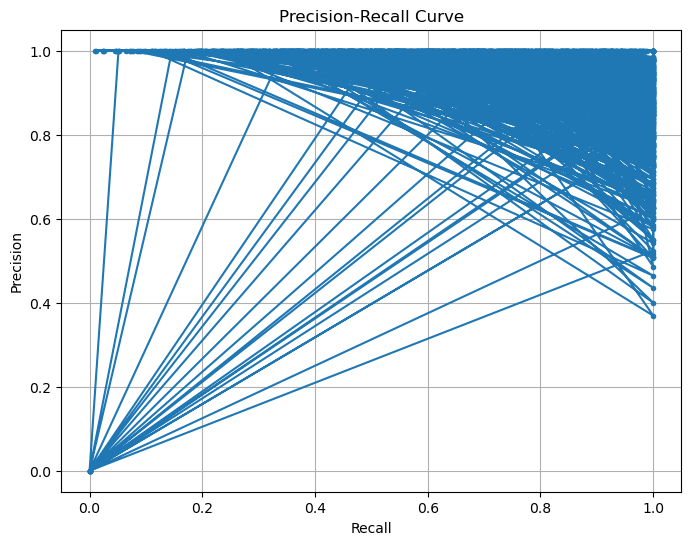

In [46]:
# plot precision_list and recall_list curve

import matplotlib.pyplot as plt

# Assuming you have already calculated the precision_list and recall_list

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_list, precision_list, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(TP, TN, FP, FN, txt):
    matrix = np.array([[TP, FP], [FN, TN]])
    # matrix1 = np.array([[TP1, FP1], [FN1, TN1]])
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap=plt.cm.Blues)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Accepted', 'Rejected'])
    ax.set_xticklabels(['Genuine', 'Imposter'])
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both',labelsize=18)
    ax.xaxis.tick_top()
    ax.set_xlabel('True Label',fontsize=18)
    ax.set_ylabel('Predicted Label',fontsize=18)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(matrix[i][j]), ha='center',fontsize=24, va='top', color='white' if matrix[i][j] > (matrix.max() / 2) else 'black')
            # ax.text(j, i, str(matrix1[i][j]), ha='center',fontsize=18, va='bottom', color='yellow' if matrix[i][j] > (matrix.max() / 2) else 'green')

    precision = (TP / (TP + FP))*100
    recall = (TP / (TP + FN))*100
    f1_score = (2 * (precision * recall) / (precision + recall))
    accuracy = ((TP + TN) / (TP + TN + FP + FN))*100
    print(f'Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1_score:.4f} | Accuracy: {accuracy:.4f}')
    far = (FP / (FP + TN))*100
    frr = (FN / (FN + TP))*100
    ap = TP + FN
    an = TN + FP
    gar = (TP / ap)*100
    grr = (TN / an)*100
    # print("precision:%f,recall:%f,f1_score:%f,accuracy:%f"%(precision,recall,f1_score,accuracy))
    # print(precision,recall,f1_score,accuracy)
    # print("far:%f,frr:%f,gar:%f,grr:%f"%(far,frr,gar,grr))
    print(f'FAR: {far:.4f} | FRR: {frr:.4f} | GAR: {gar:.4f} | GRR: {grr:.4f}')
    fig.text(0.5, 0.01, txt, ha='center', fontsize=16)


    plt.show()

Precision: 97.3817 | Recall: 55.8385 | F1-Score: 70.9782 | Accuracy: 55.0126
FAR: 100.0000 | FRR: 44.1615 | GAR: 55.8385 | GRR: 0.0000


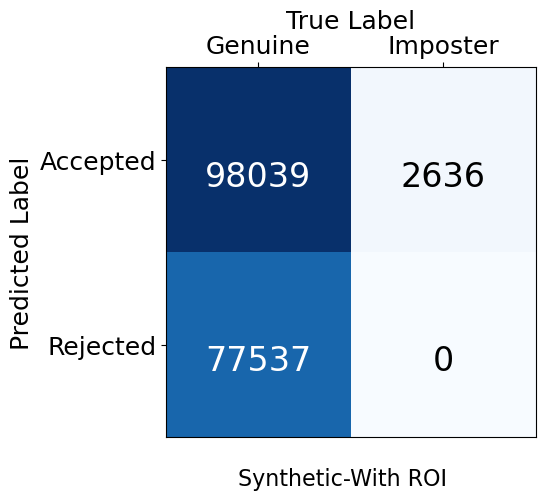

In [38]:
TP = true_positives_total
TN = 0
FP = false_positives_total
FN = false_negatives_total

plot_confusion_matrix(TP, TN, FP, FN,"Synthetic-With ROI")

Cosine

In [8]:
import os
import numpy as np

def load_minutiae_points(file_path):
    minutiae_points = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()
        filename = os.path.basename(lines[0].strip())
        minutiae_data = lines[1:]
        minutiae_points[filename] = [(float(data.split()[0]), float(data.split()[1]), float(data.split()[2])) for data in minutiae_data]
    return minutiae_points

def calculate_cosine_similarity(point1, point2):
    x1, y1 = point1
    x2, y2 = point2

    # Convert angles to radians for cosine calculation
    # a1_rad = np.radians(a1)
    # a2_rad = np.radians(a2)

    # Calculate cosine similarity
    # similarity = np.cos(a1_rad) * np.cos(a2_rad) + np.sin(a1_rad) * np.sin(a2_rad) * np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    similarity = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    return similarity


# # File paths for datasets 1 and 2 containing minutiae points
# # Replace 'fvc2006db2a_traditional_minutiae' and 'Minutiae_points_fvc2006db2_fingernet' with your actual folder names
# dataset1_folder = '/home/mt0/22CS60R42/minutae matching/fvc2006db2a_traditional_minutiae'
# dataset2_folder = '/home/mt0/22CS60R42/minutae matching/Minutiae_points_fvc2006db2_fingernet'

# print("Dataset 1 folder exists:", os.path.exists(dataset1_folder))
# print("Dataset 2 folder exists:", os.path.exists(dataset2_folder))

# # Check if files exist in the folders
# print("Files in dataset 1 folder:", os.listdir(dataset1_folder))
# print("Files in dataset 2 folder:", os.listdir(dataset2_folder))



# # Load minutiae points from both datasets
# dataset1_points = {}
# for file in os.listdir(dataset1_folder):
#     if file.endswith('.txt'):
#         dataset1_points.update(load_minutiae_points(os.path.join(dataset1_folder, file)))

# dataset2_points = {}
# for file in os.listdir(dataset2_folder):
#     if file.endswith('.mnt'):
#         dataset2_points.update(load_minutiae_points(os.path.join(dataset2_folder, file)))


In [12]:

# Set the similarity threshold for matching
similarity_threshold = 5  # You can adjust this value based on your specific scenario
# Calculate evaluation metrics based on direct matching
# Calculate evaluation metrics based on direct matching
true_positives = 0
false_positives = 0
false_negatives = 0

for filename in dataset1_points.keys():
    if filename in dataset2_points:
        gt_points = dataset1_points[filename]
        alg_points = dataset2_points[filename]

        for gt_point in gt_points:
            matched = False
            for alg_point in alg_points:
                similarity = calculate_cosine_similarity(alg_point, gt_point)
                if similarity <= similarity_threshold:
                    true_positives += 1
                    matched = True
                    break
            if not matched:
                false_negatives += 1

        # Calculate false positives
        for alg_point in alg_points:
            matched = False
            for gt_point in gt_points:
                similarity = calculate_cosine_similarity(alg_point, gt_point)
                if similarity >= similarity_threshold:
                    matched = True
                    break
            if not matched:
                false_positives += 1

# Remaining code to calculate other metrics remains the same
# Calculate false positives


# Calculate false positives
for filename in dataset2_points.keys():
    if filename not in dataset1_points:
        false_positives += len(dataset2_points[filename])

# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)

# Calculate Precision
precision = true_positives / (true_positives + false_positives)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate FMR (False Match Rate)
fmr = false_positives / (false_positives + true_positives)

# Calculate FNMR (False Non-Match Rate)
fnmr = false_negatives / (false_negatives + true_positives)

# Calculate EER (Equal Error Rate)
eer = (fmr + fnmr) / 2

# Print the results
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Recall (True Positive Rate): {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"FMR (False Match Rate): {fmr:.2f}")
print(f"FNMR (False Non-Match Rate): {fnmr:.2f}")
print(f"EER (Equal Error Rate): {eer:.2f}")


True Positives: 4359
False Positives: 0
False Negatives: 171217
Recall (True Positive Rate): 0.02
Precision: 1.00
F1 Score: 0.05
FMR (False Match Rate): 0.00
FNMR (False Non-Match Rate): 0.98
EER (Equal Error Rate): 0.49
